## 분류(Classification) 성능 평가 지표

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어
* ROC AUC

---

### 정확도(Accuracy)

* 정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
* 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다.
    * 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않습니다.
    * ex) 신용카드 사기 검출 -> 그냥 다 정상이라고만 해도 정확도 수치가 99%가 나옴
* 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아닙니다.

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메소드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    
    # predict() 메소드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros( (X.shape[0], 1) ) # 열 길이가 1인 2차원 배열로 생성
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행.
my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)

mypredictions = my_clf.predict(X_test)
print('Dummy Classifier의 정확도 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도 : 0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool )
    
# 사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print('digits.data.shape : ', digits.data.shape)
print(digits.target)
print('digits.target.shape : ', digits.target.shape) # 0이면 숫자 0, 1이면 숫자 1

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.data.shape :  (1797, 64)
[0 1 2 ... 8 9 8]
digits.target.shape :  (1797,)


In [5]:
# ndarray에 조건식이 들어가면 boolean 값이 들어간 array가 나옴

digits.target == 7

array([False, False, False, ..., False, False, False])

In [6]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1 반환, 7번이 아닌면 False이고 0으로 반환

y = (digits.target == 7).astype(int) # True->1, False->0
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [7]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

print('모든 예측을 0으로 하였을 때 정확도 : {0:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하였을 때 정확도 : 0.900


### 오차 행렬(Confusion Matrix)
* 오차 행렬은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.
* 분류
    * TP(True Positive) : 예측 클래스(Predicted Class)=Positive, 실제 클래스(Actual Class)=Positive
    * TN(True Negative) : 예측 클래스(Predicted Class)=Negative, 실제 클래스(Actual Class)=Negative
    * FP(False Positive) : 예측 클래스(Predicted Class)=Positive, 실제 클래스(Actual Class)=Negative
    * FN(False Negative) : 예측 클래스(Predicted Class)=Negative, 실제 클래스(Actual Class)=Positive
    
* 형태
    * TN | PN
    * FN | TP

In [9]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

---
### 정밀도(Precision)과 재현율(Recall)

* 정확도 = (TN+TP) / (TN+FP+FN+TP)
* 정밀도 = TP / (FP + TP)
    * 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율을 뜻합니다.
* 재현율 = TP / (FN + TP)
    * 실제 값이 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정확도 : ', accuracy_score(y_test, fakepred))
print('정밀도 : ', precision_score(y_test, fakepred))
print('재현율 : ', recall_score(y_test, fakepred))

정확도 :  0.9
정밀도 :  0.0
재현율 :  0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(max_iter=500)

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


### 업무에 따른 재현율과 정밀도의 상대적 중요도

* 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    * ex) 암 진단, 금융사기 판별
* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative인 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    * ex) 스팸 메일

### Precision/Recall Trade-off
* 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다.
* 하지만 정밀도와 재현율은 상호 보와적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽습니다. 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부릅니다.

### 분류 결정 임곗값에 따른 Positive 예측 확률 변화
* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)

    * 분류 결정 임곗값이 낮아질수록 Positive로 예측할 확률이 높아짐 -> 재현율 증가(애초에 Negative에 대한 결정확률이 줄어드니..)
        * 사이킷런 Estimator 객체의 predict_proba() 메소드는 분류 결정 예측 확률을 반환합니다.
        * 이를 이용하면 임의로 분류 결정 임곗값을 조정하면서 예측 확률을 변경할 수 있습니다.

#### predict_proba() 메소드 확인

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 => \n', pred_proba[:3])

# pred_proba 구조 : [ [0이 될 확률, 1이 될 확률], ... ]

# 예측 확률 array와 예측 결과 array를  concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 => \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 => 
 [[0.46200316 0.53799684]
 [0.87869995 0.12130005]
 [0.87717144 0.12282856]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 => 
 [[0.46200316 0.53799684 1.        ]
 [0.87869995 0.12130005 0.        ]
 [0.87717144 0.12282856 0.        ]]


#### Binarizer 활용

In [14]:
from sklearn.preprocessing import Binarizer

X = [
    [1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)

print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 반환

In [17]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.5

# pred_proba[:, 1] -> 모든행의 두번째 컬럼
# predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 컬럼(1이 될 확률) 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


#### 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 반환

In [18]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.4

# pred_proba[:, 1] -> 모든행의 두번째 컬럼
# predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 컬럼(1이 될 확률) 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


#### 여러 개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

In [19]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임곗값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


### 분류 결정 임곗값에 따른 정밀도, 재현율 곡선
* 사이킷런은 precision_recall_curve() 함수를 통해 임곗값에 따른 정밀도, 재현율의 변화값을 제공합니다.

#### precision_recall_curve()를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [21]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape : ', thresholds.shape)
print('반환된 precisions 배열의 Shape : ', precisions.shape)
print('반환된 recalls 배열의 Shape : ', recalls.shape)

print('thresholds 5 sample : ', thresholds[:5])
print('precisions 5 sampe : ', precisions[:5])
print('recalls 5 sample : ', recalls[:5])

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15) # np.arange(start, end, step)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현용 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape :  (143,)
반환된 precisions 배열의 Shape :  (144,)
반환된 recalls 배열의 Shape :  (144,)
thresholds 5 sample :  [0.10389371 0.10389596 0.10392113 0.1078898  0.10886732]
precisions 5 sampe :  [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample :  [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


#### 임계값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

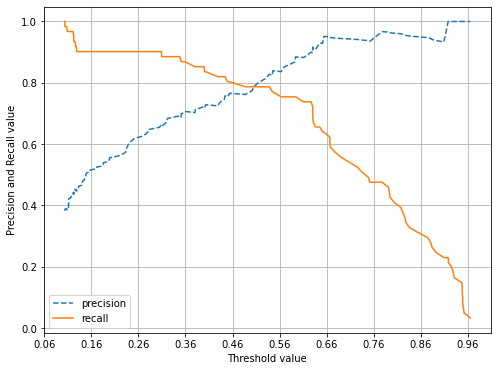

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0, 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축, label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

---
### F1 Score
* F1 Score는 정밀도와 재현율을 결합한 지표입니다.
* 정밀도와 재현율이 어느 한쪽으로 치우지지 않는 수치를 나타낼 때 상대적으로 높은 값을 지닙니다.
* F1 = 2 / ( 1/recall + 1/precision ) = 2 * ( precision * recall ) / (precision + recall )
* 사이킷런은 f1 score를 위해 f1_score() 함수를 제공합니다.

* f1_score()

In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


In [34]:
# 기존 함수에 F1 스코어 항목 추가
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # F1 score print 추가
    print('정확도 : {0: .4f}, 정밀도 : {1: .4f}, 재현율 : {2: .4f}, F1 : {3: .4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임곗값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 :  0.8324, 정밀도 :  0.7183, 재현율 :  0.8361, F1 :  0.7727
임곗값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 :  0.8492, 정밀도 :  0.7656, 재현율 :  0.8033, F1 :  0.7840
임곗값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 :  0.8492, 정밀도 :  0.7742, 재현율 :  0.7869, F1 :  0.7805
임곗값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 :  0.8659, 정밀도 :  0.8364, 재현율 :  0.7541, F1 :  0.7931
임곗값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 :  0.8771, 정밀도 :  0.8824, 재현율 :  0.7377, F1 :  0.8036


### ROC Curve과 AUC
* ROC 곡선(Receiver Operation Characteristic Curve)과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다.
* ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선입니다.
* FPR은 X축으로, TPR은 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타납니다.
* 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC값으로 결정합니다.
* AUC(Area Under Curve)값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치입니다.

### ROC Curve
* FPR의 변화에 따른 TPR의 변화 곡선
* TPR은 재현율, 민감도를 나타냅니다. 따라서 TPR은 TP / (FN+TP)입니다.
* FPR은 실제 Negative(음성)을 잘못 예측한 비율을 나타냅니다. 즉 실제는 Negative인데 Positive 또는 Negative로 예측한 것 중 Positive로 잘못 예측한 비율입니다. FPR = FP / (FP+TN)입니다.

In [35]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# roc_curve -> FPR, TPR, Threshold 값 반환
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개 :  [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임계값 :  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임계값별 FPR :  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임계값별 TPR :  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


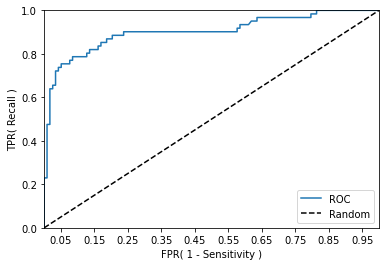

In [36]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0, 1 단위로 변경, X, Y 축명 설정들
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [37]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024


In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall =recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0: .4f}, 정밀도 : {1: .4f}, 재현율 : {2: .4f}, F1 : {3: .4f}, AUC : {4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))